# Сверточные нейронные сети для распознавания образов

In [1]:
# Загружаем основные библиотеки
from tensorflow.keras.datasets import mnist
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем датасет
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Размер тренировочной выборки
X_train.shape

(60000, 28, 28)

In [4]:
# Размер тестовой выборки
X_test.shape

(10000, 28, 28)

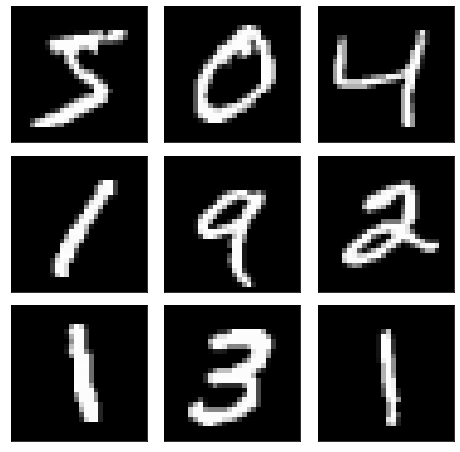

In [5]:
# Визуализируем некоторые элементы датасета
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(9):
 ax = fig.add_subplot(330 + 1 + i, xticks=[], yticks=[])
 ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
# Библиотеки, необходимые для обучения модели
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [7]:
# Переформатирование изображений
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [9]:
# Нормализация изображений
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [10]:
# One-hot кодирование
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
# Структура модели
cnn = Sequential()

# Первый сверточный слой
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Первый слой подвыборки
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Второй слой подвыборки
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Слой преобразовани данных
cnn.add(Flatten())

# Первый полносвязный нейронный слой
cnn.add(Dense(units=128, activation='relu'))

# Полносвязный нейронный слой с функцией активации softmax
cnn.add(Dense(units=10, activation='softmax'))

In [12]:
# Вывод сводной информации модели
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

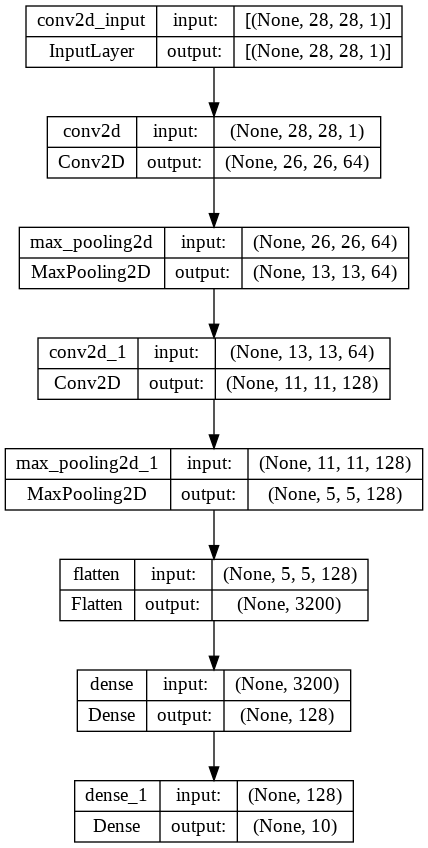

In [15]:
# Визуализация структуры модели
plot_model(cnn, to_file='ns_structure.png', show_shapes=True,
show_layer_names=True)
Image(filename='ns_structure.png')

In [16]:
# Компилируем модель
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
# Обучаем модель, количество эпох - 5
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 13s 5ms/step - loss: 0.1383 - accuracy: 0.9572 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 2/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0382 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 5/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0324 - val_accuracy: 0.9912


In [18]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9918


In [22]:
# Показатель ошибки модели на тестовых данных
print(f' Ошибка = {loss:.3}')

 Ошибка = 0.0274


In [20]:
# Показатель точности модели на тестовых данных
print(f' Точность = {accuracy:.2%}')

 Точность = 99.18%


In [25]:
# Поиск неправильных прогнозов
predictions = cnn.predict(X_test)

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append(
      (i, images[i], predicted, expected))

313/313 [==============================] - 1s 2ms/step


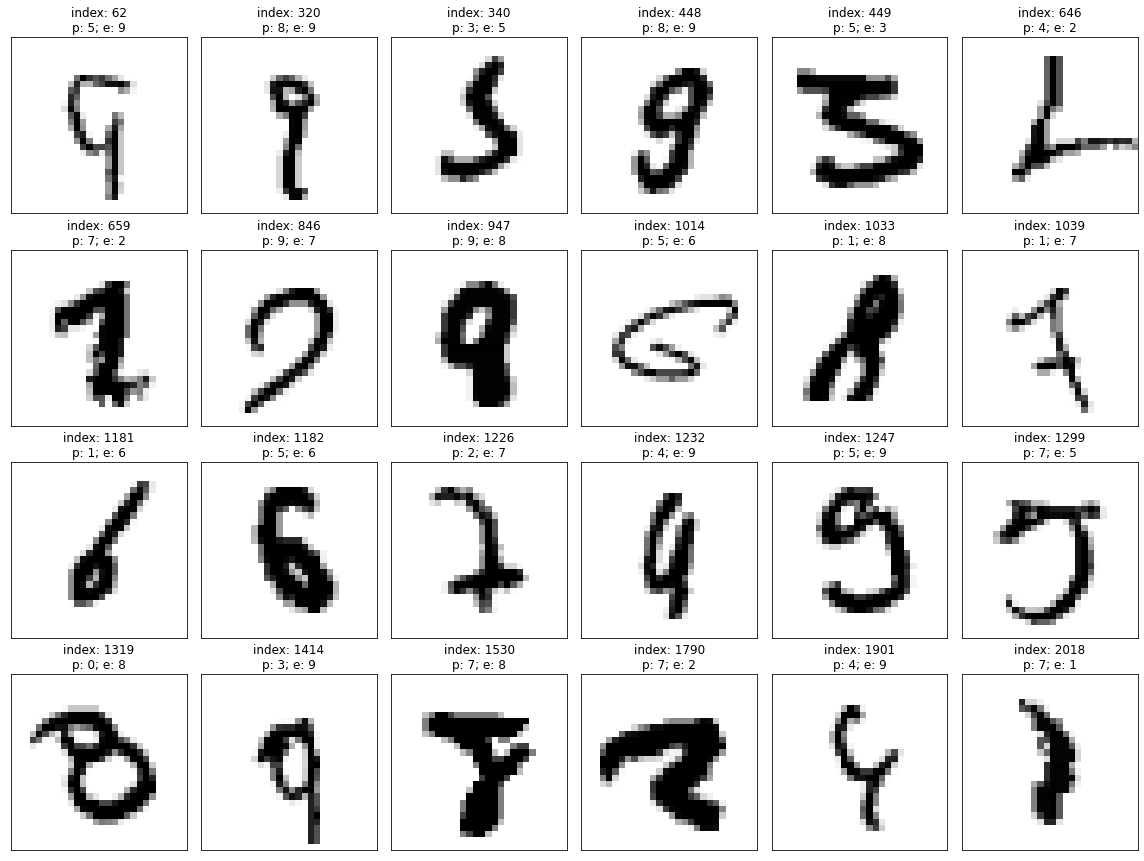

In [27]:
# Визуализация неправильных прогнозов
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()  

In [ ]:
# Сохранение модели
cnn.save('mnist_cnn.h5')